<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/ProyectoFinal/ProyectoFinal_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final: Machine Learning Agosto-Diciembre 2023
*Saúl Ruano Sánchez NUA: 435719*

<a class="anchor" id="introduccion"></a>
#Introducción

En los últimos años, las redes neuronales convolucionales han experimentado un notable impulso, destacándose como herramientas fundamentales en el ámbito de la visión computacional. Su popularidad se debe, en gran medida, a su eficacia en comparación con las redes neuronales convencionales. Una de las ventajas clave de las CNNs es la reducción de parámetros durante el entrenamiento, lo que les permite detectar patrones en imágenes de manera más eficiente. En este proyecto de aprendizaje automático, se explorará y aprovechará el potencial de las redes neuronales convolucionales para abordar desafíos específicos en el ámbito de la visión computacional.

#Planteamiento del Problema

Este proyecto utiliza redes neuronales para detectar personas con cubrebocas, dada la importancia de este elemento debido al COVID-19. El objetivo es desarrollar un sistema eficiente que identifique personas con cubrebocas en imágenes, contribuyendo a la seguridad y cumplimiento de medidas de salud.

Importamos las librerias necesarias para realizar este problema.

In [1]:
#Importamos la Librerias
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Elección de los Datos

Para este proyecto se uso el siguiente dataset de Kaggle:

https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset/data

Donde ya se encuentran separadas, las imagénes de personas con cubrebocas y sin cubrebocas. Lo cual hace más fácil el etiquetado de estás imagenes.




In [2]:
#Creamos una función para leer las imagenes del dataset
from PIL import Image
import os


def read_images(directory_path):
    image_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            image = Image.open(img_path)
            image = image.resize((64,64)) #Hacemos un reshape de las imagénes
            image_array = np.array(image)
            image_list.append(image_array)
    return np.array(image_list)

#Leemos la imagenes para training, del dataset cargado en Drive
directory_path = '/content/drive/MyDrive/Data/Face Mask Dataset/Train/WithMask'
images_with_mask = read_images(directory_path)
directory_path = '/content/drive/MyDrive/Data/Face Mask Dataset/Train/WithoutMask'
images_without_mask = read_images(directory_path)

In [4]:
#Creamos arrays para el etiquetado de las imagenes.
y_yes = np.ones(images_with_mask.shape[0])
y_no = np.zeros(images_without_mask.shape[0])

y = np.hstack([y_yes, y_no])
y.shape

(10000,)

Agregamos todas las imágenes en un mismos array

In [5]:
x_train = np.vstack([images_with_mask, images_without_mask])

Observemos el tipo de imagenes con las que se trabajaran

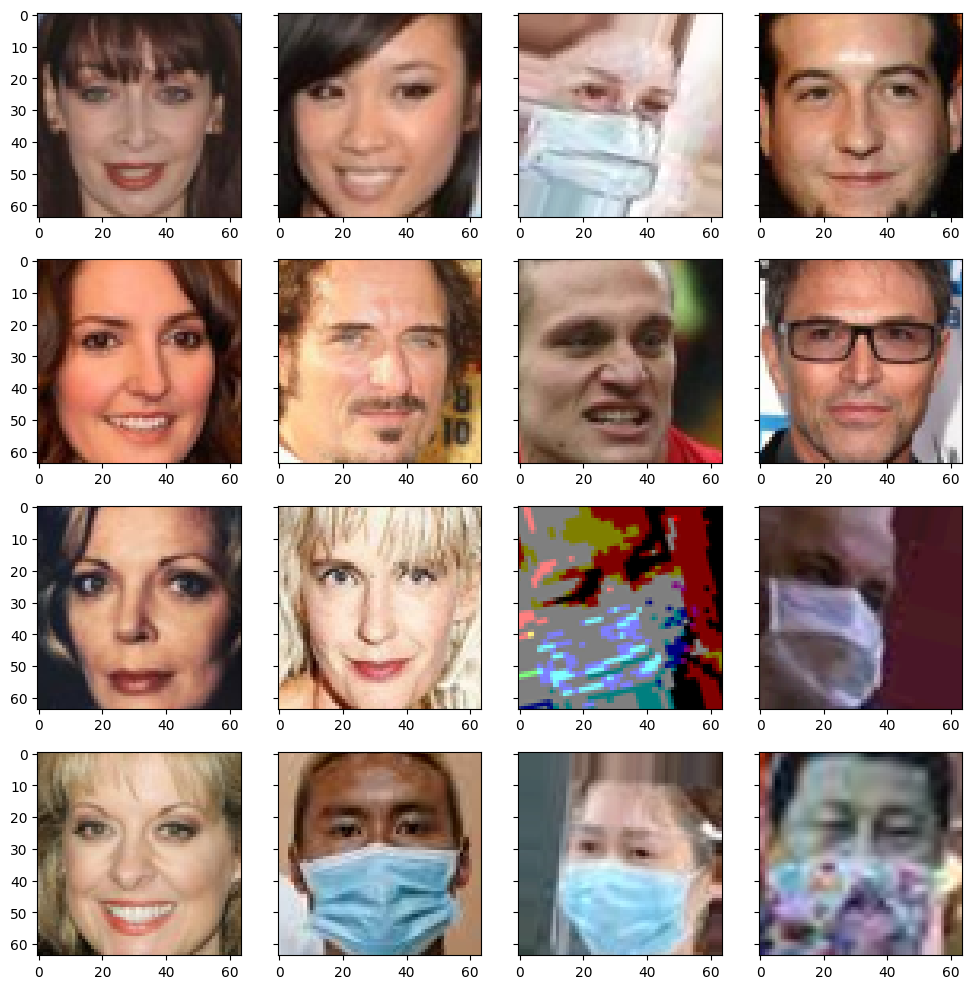

In [7]:
index_array = np.arange(len(x_train))
np.random.shuffle(index_array)

#Obtenemos imagenes acomodadas de forma random
prueba_x = x_train[index_array]


fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 10), sharey=True)

for i in range(16):
    image = prueba_x[i]
    row = i // 4
    col = i % 4
    ax[row][col].imshow(image)

plt.tight_layout()
plt.show()

# LeNet5

Está arquitectura es una de las arquitecturas de CNN (Convolutional Neural Networks). Esta arquitectura fue introducida por Yann LeCun en 1998, y ha sido altamente usada para el reconocimiento de números escritos a mano (MINST).

##### Arquitectura LeNet-5

# Arquitectura LeNet-5 (MINST)

## Capa de Entrada
- Input: Imágenes de 32x32 píxeles en escala de grises.

## Capa Convolucional
- Filtros: 6
- Tamaño del kernel: 5x5
- Stride: 1
- Activación: Tanh

## Capa de Submuestreo
- Operación: Submuestreo promedio (2x2, stride 2)
- Esta capa nos reduce la dimensionalidad de las imágenes a la mitad

## Capa Convolucional
- Filtros: 16
- Tamaño del kernel: 5x5
- Activación: Tanh

## Capa de Submuestreo
- Operación: Submuestreo promedio (2x2, stride 2)
- Esta capa nos reduce la dimensionalidad de las imágenes a la mitad

## Capa Totalmente Conectada 1
- Neuronas: 120
- Activación: Tanh

## Capa Totalmente Conectada 2
- Neuronas: 84
- Activación: Tanh

## Capa de Salida
- Neuronas: 10 (correspondientes a las clases en MNIST)
- Activación: Softmax

Para este proyecto, se tomo esta arquitectura como base. Se realizaron cambios a la arquitectura para que se adapatará a nuestro problema.

### Cambios

- Capa de Entrada. Solo se cambio la dimensión de las imagénes, en este caso estamos trabajando con imágenes en RGB, de 64x64 pixeles, esto para no perder tanta información de las imágenes, si el resize fuera de 32x32.

- Capas Convolucinales. Se realizo un cambio a la función de activación por la función ReLU. Pero el tamaño del kernel, stride y padding es el mismo.

- Capas Totalmente conectadas. Se cambió de igual manera las funciones de activación por ReLU, y para la capa de salida se cambio la función de activación por la función sigmoide, ya que estamos en un problema de clasificación binario.



## Implentación del Modelo usando Keras

In [1]:
#Importamos librerías necesarias
from tensorflow import keras
from keras import layers

In [ ]:
#LeNet5

lenet = keras.models.Sequential([
    layers.Conv2D(6, 5, activation='relu', padding='same',
                        input_shape=[64, 64, 3]),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(16, 5, strides=(1,1), activation = 'relu', padding='valid'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(120, 5, padding = 'valid', activation = 'relu'),
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])


Observamos un resumen de todos los paramétros entrenables de la red neuronal

In [ ]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 32, 32, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 14, 14, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 120)       48120     
                                                                 
 flatten_1 (Flatten)         (None, 12000)            

Compilamos el modelo, usando una función costro para clasificación binaria.
Usamos el optimizer adam, para el entrenamiento de la red.

In [ ]:
lenet.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

Ahora entrenamos el modelo. Solamente durante 5 épocas, ya que con este número se consigue un buen accuracy del modelo.

In [ ]:
lenet.fit(x_train, y, epochs=5)

Epoch 1/5
313/313 [==============================] - 4s 7ms/step - loss: 0.9385 - accuracy: 0.9492
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9785
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9822
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9807


## Testeo del modelo

Ahora cargamos imágenes para poder hacer un testeo del modelo. De igual forma imagénes de 64x64, de personas con cubrebocas y sin cubrebocas.

In [ ]:
x_test_mask = read_images('/content/drive/MyDrive/Data/Face Mask Dataset/Test/WithMask')
x_test_wmask = read_images('/content/drive/MyDrive/Data/Face Mask Dataset/Test/WithoutMask')

x_test = np.vstack([x_test_mask, x_test_wmask])

y_test_yes = np.ones(x_test_mask.shape[0])
y_test_no = np.zeros(x_test_wmask.shape[0])

y_test = np.hstack([y_test_yes, y_test_no])

Usamos la función de tensorflow, para poder observar el performance del modelo.

In [ ]:
lenet.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9627


[0.12664301693439484, 0.9627016186714172]

Con esto observamos tenemos un buen accuracy del modelo. Para nuestra imagénes de testeo del dataset.

Queremos ahora observar las imagénes con las que se ha testeado el modelo, para esto usando la función predict, predecimos el label de la imágenes.

In [ ]:
y_predict = lenet.predict(x_test)

31/31 [==============================] - 0s 3ms/step


In [ ]:
index_array = np.arange(len(x_test))
np.random.shuffle(index_array)

# Use the shuffled index array to shuffle both images and labels
shuffled_images = x_test[index_array]
shuffled_labels = y_predict[index_array]
shuffled_good_labels = y_test[index_array]

A continuación se muestran la imagénes de testeo, junto a sus respectivos labels el predecido (redondeado) y su label real.

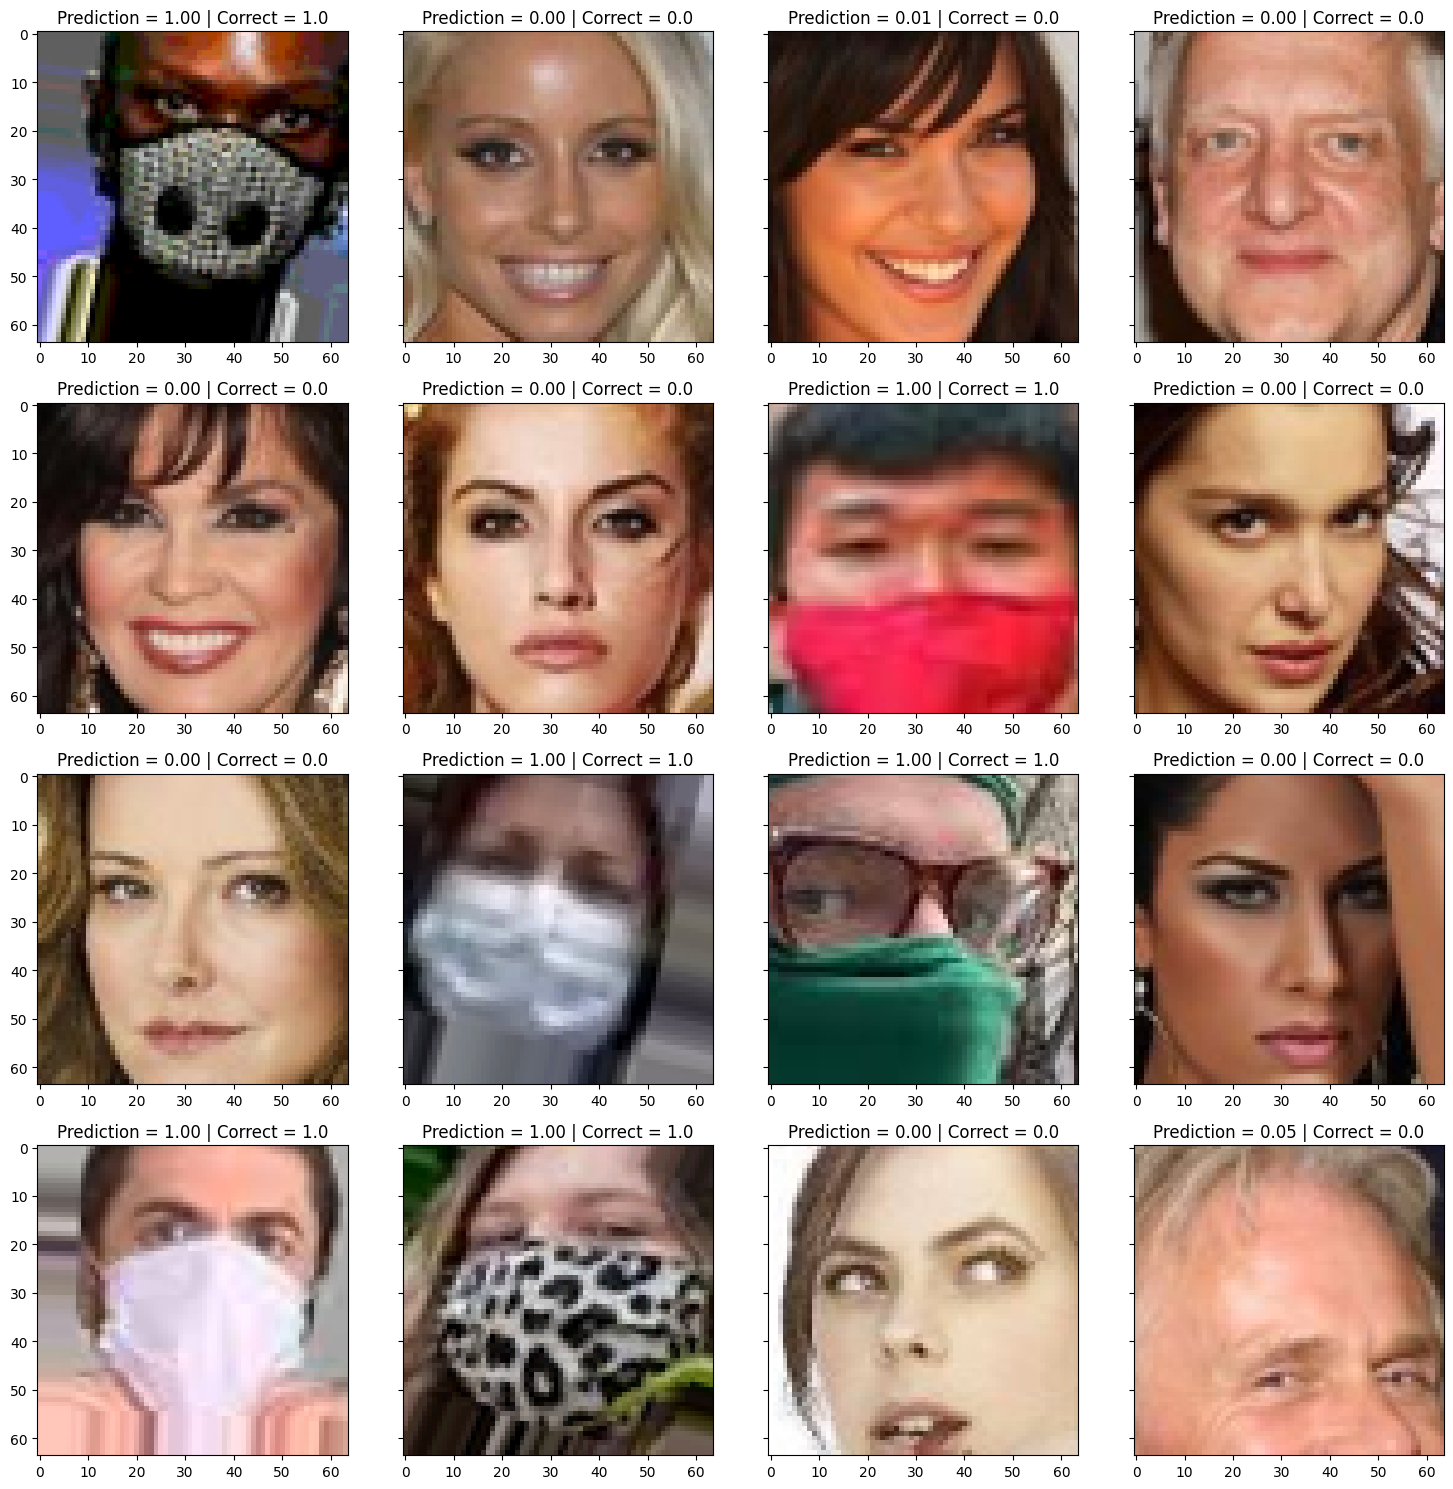

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 15), sharey=True)

for i in range(16):
    image = shuffled_images[i]
    row = i // 4
    col = i % 4 #Potter
    ax[row][col].imshow(image)
    ax[row][col].set_title(f'Prediction = {float(shuffled_labels[i]):.2f} | Correct = {shuffled_good_labels[i]}')

plt.tight_layout()
plt.show()
#Codigo hecho por Saul

Observamos que el modelo, nos puede dar una muy buena predicción para las imágenes de testeo.

# Conclusiones

Si bien el propósito de la arquitectura es la clasificación de números escritos, su elección de hiperparámetros son muy buenos para el reconocimiento de patrones, por lo que fácilmente podemos usarla para un problema de clasificación que no sea tan complejo. Sin embargo, cabe mencionar que para este problema sería bueno explorar una arquitectura más compleja que la Lenet-5.